In [1]:
import pandas as pd
loan = pd.read_csv('/content/sample_data/loan.csv')
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [3]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

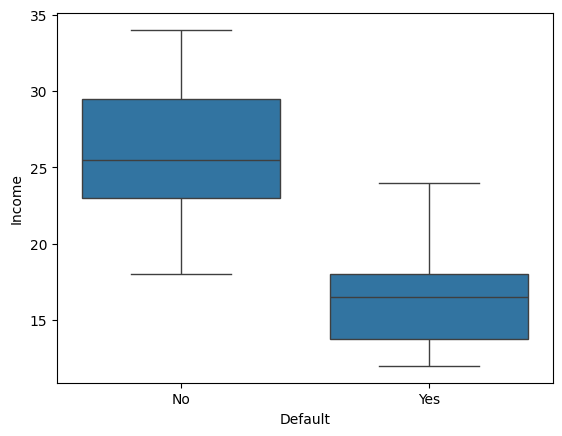

In [5]:
ax = sns.boxplot(data=loan, x='Default', y='Income')

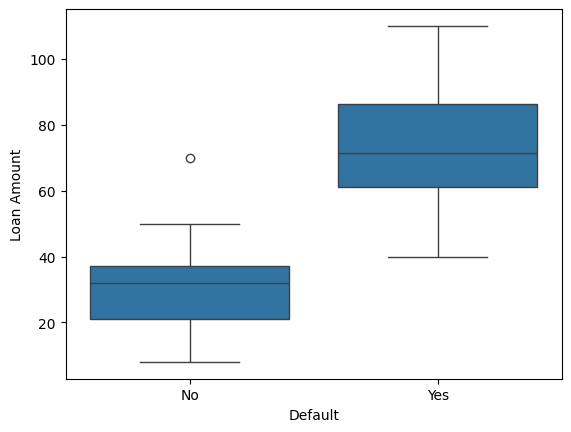

In [6]:
ax = sns.boxplot(data=loan, x='Default', y='Loan Amount')

In [7]:
import numpy as np


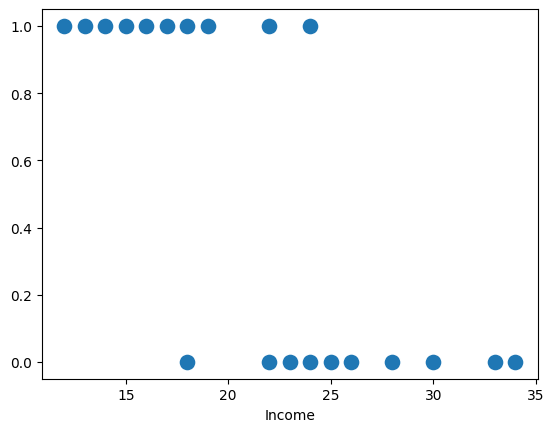

In [8]:
ax = sns.scatterplot(x = loan['Income'],
                     y = np.where(loan['Default'] == 'No', 0,1),
                    #  markers = ['*', 'o'],
                     s = 150)

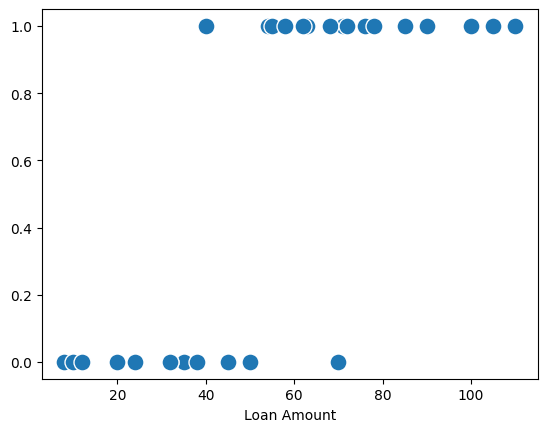

In [9]:
ax = sns.scatterplot(x = loan['Loan Amount'],
                     y = np.where(loan['Default'] == 'No', 0,1),
                    #  markers = ['*', 'o'],
                     s = 150)

**Prepare the Data**

In [10]:
y = loan['Default']
x = loan[['Income', 'Loan Amount']]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,
                                                    stratify=y, random_state=123)



In [11]:
x_train.shape, x_test.shape

((21, 2), (9, 2))

**Train and Evaluate the Model**

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

model = classifier.fit(x_train, y_train)

In [13]:
model.predict(x_test)




array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [14]:
model.score(x_test, y_test)


0.8888888888888888

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(x_test))

array([[3, 1],
       [0, 5]])

Confusion matrix -   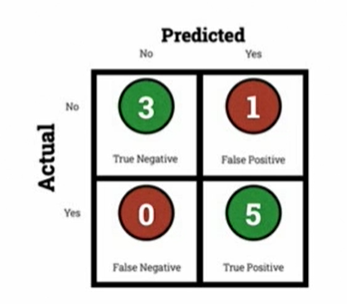

**Interpret Model**

In [16]:
model.intercept_

array([15.4670632])

In [17]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

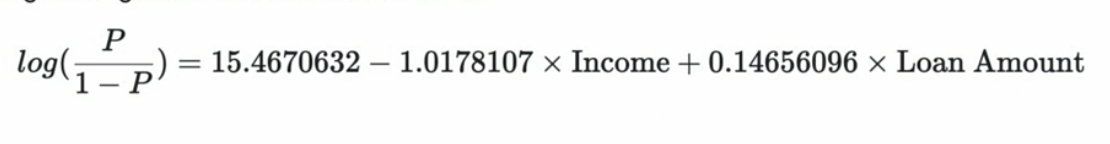

In [20]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([-1.02,  0.15])

In [21]:
pd.DataFrame({'log odds': log_odds}, index=x.columns)

,log odds
Income,-1.02
Loan Amount,0.15


In [22]:
odds = np.round(np.exp(log_odds), 2)

pd.DataFrame({'odds': odds}, index=x.columns)


,odds
Income,0.36
Loan Amount,1.16
